In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

In [2]:
def generate_perlin_noise_2d(shape, res):
    def f(t):
        return 6*t**5 - 15*t**4 + 10*t**3
    
    delta = (res[0] / shape[0], res[1] / shape[1])
    d = (shape[0] // res[0], shape[1] // res[1])
    grid = np.mgrid[0:res[0]:delta[0],0:res[1]:delta[1]].transpose(1, 2, 0) % 1
    # Gradients
    angles = 2*np.pi*np.random.rand(res[0]+1, res[1]+1)
    gradients = np.dstack((np.cos(angles), np.sin(angles)))
    g00 = gradients[0:-1,0:-1].repeat(d[0], 0).repeat(d[1], 1)
    g10 = gradients[1:,0:-1].repeat(d[0], 0).repeat(d[1], 1)
    g01 = gradients[0:-1,1:].repeat(d[0], 0).repeat(d[1], 1)
    g11 = gradients[1:,1:].repeat(d[0], 0).repeat(d[1], 1)
    # Ramps
    n00 = np.sum(grid * g00, 2)
    n10 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1])) * g10, 2)
    n01 = np.sum(np.dstack((grid[:,:,0], grid[:,:,1]-1)) * g01, 2)
    n11 = np.sum(np.dstack((grid[:,:,0]-1, grid[:,:,1]-1)) * g11, 2)
    # Interpolation
    t = f(grid)
    n0 = n00*(1-t[:,:,0]) + t[:,:,0]*n10
    n1 = n01*(1-t[:,:,0]) + t[:,:,0]*n11
    return np.sqrt(2)*((1-t[:,:,1])*n0 + t[:,:,1]*n1)

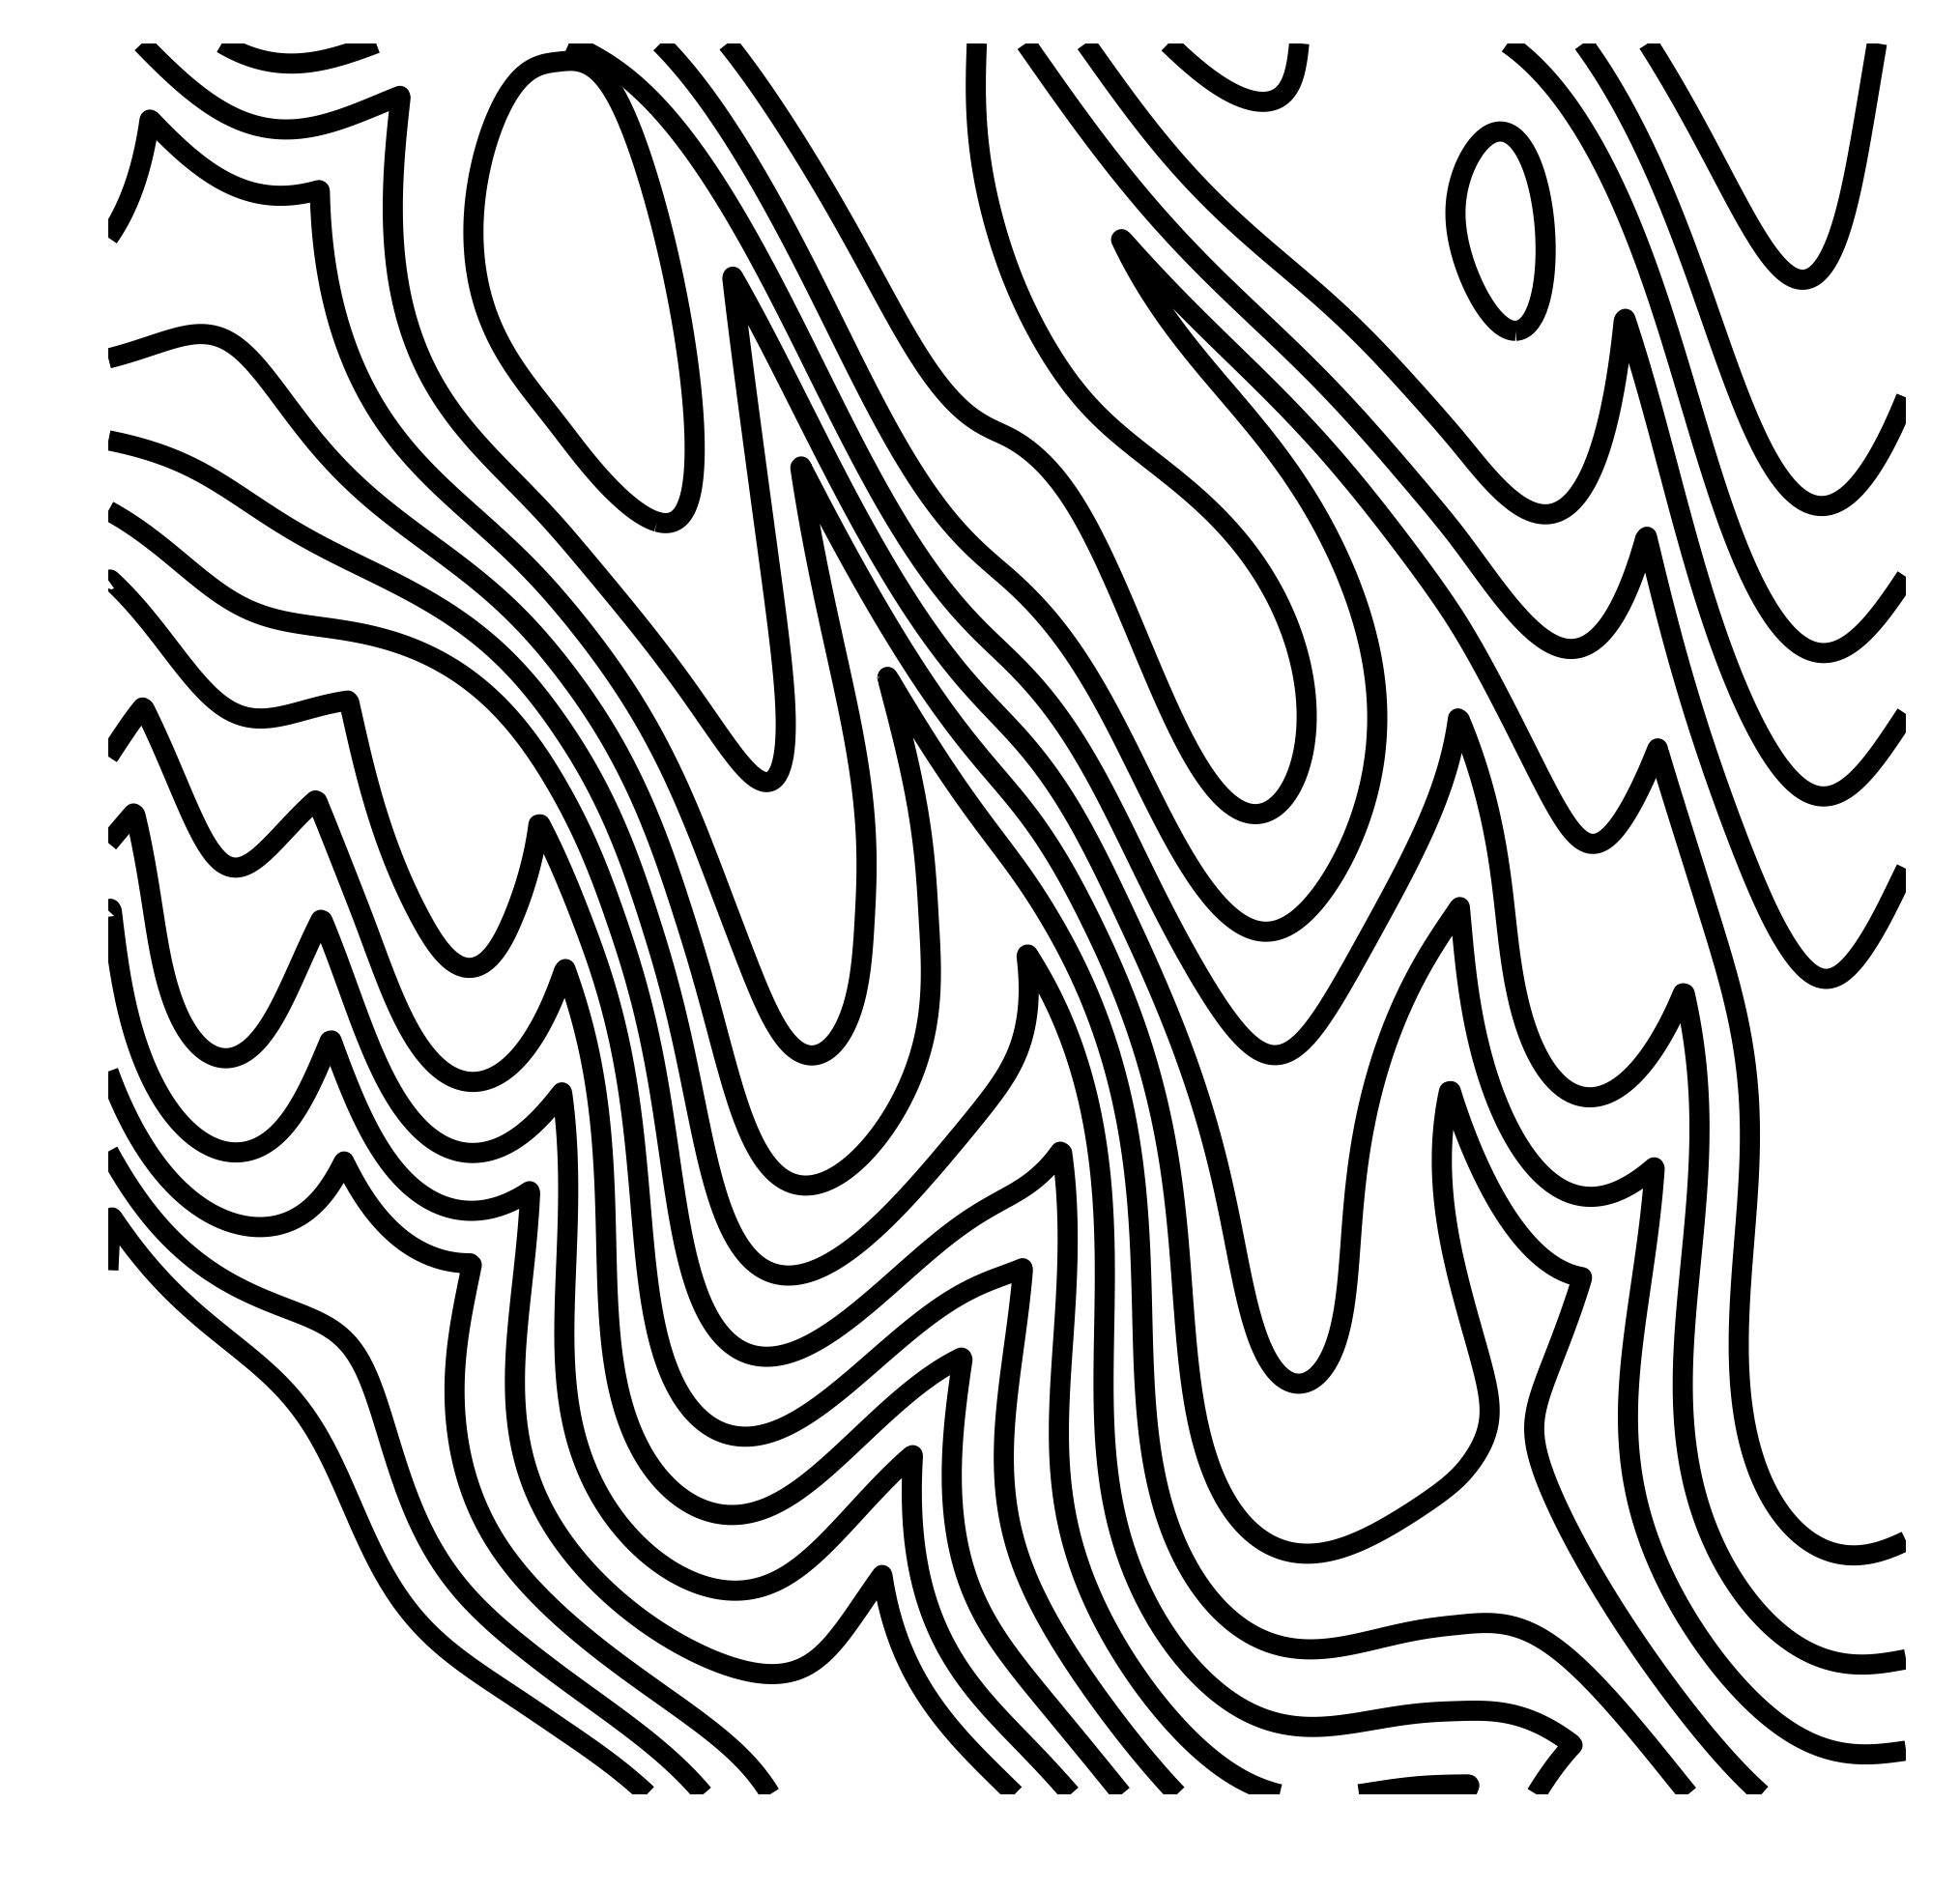

In [8]:
canvas_size_x, canvas_size_y = 8, 8 # In inches
xmin, xmax = 0.5, 10
ymin, ymax = 0.5, 10

# Parameters for perlin noise
period_x, period_y = 2, 4
noise_strength = 1

# Parameters for ellipses
x_offset, y_offset = -5, -5
ellipse_strength = 0.25

# Parameters for contours
num_contours = 30
log_base = 15
line_width = 5

np.random.seed(2)

x = np.linspace(xmin, xmax, num=1000)
y = np.linspace(ymin, ymax, num=1000)
z1 = np.fabs(generate_perlin_noise_2d((len(x), len(y)), (period_x, period_y)))
z2 = np.empty((len(x), len(y)))

for idx in range(len(y)):
    z2[idx] = np.sqrt((x-x_offset)**2 + (y[idx]-x_offset)**2)

z_comb = z1*noise_strength + z2*ellipse_strength + 1
l = np.logspace(np.log10(np.min(z_comb)), np.log10(np.max(z_comb)), num_contours, base=log_base)

fig, axes = plt.subplots(figsize=(canvas_size_x, canvas_size_y), dpi=300)
axes.contour(x, y, z_comb, levels=l, colors='black', linewidths=line_width)
axes.set_xlim(xmin, xmax)
axes.set_ylim(ymin, ymax)

plt.axis('off')
plt.savefig('graphic.eps',  bbox_inches='tight')